In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.special import factorial

In [14]:
def fdcoeff(k, stencil):
    N = len(stencil)
    A = np.array([[m**n/factorial(n) for m in stencil] for n in range(N)], dtype=np.float64)
    b = np.zeros(N)
    b[k] = 1
    return linalg.solve(A, b)


def fdm(func, k, xbar, stencil, h, *, VERBOSE=False):
    x =  np.array(stencil) * h
    am = fdcoeff(k, stencil) # get coefficients
    if VERBOSE: 
        print("a_m = ")
        with np.printoptions(precision=4, linewidth=120):
            print(am)
    return (func(x) @ am) / h**k

def U(x):
    return np.exp(np.cos(x))

def dU(x):
    return -np.sin(x)*np.exp(np.cos(x))

def dU2(x): 
    return (np.sin(x)**2 - np.cos(x)) * np.exp(np.cos(x))

## Find the stencil

In [15]:
def convergence(stencil, k):
    
    h_list = np.array([1/2**s for s in range(1,9)])
    errors = []
    if k == 0:
        func = U
    elif k == 1:
        func = dU
    elif k == 2:
        func = dU2
    
    EXACT = func(0)
    for h in h_list:
        FDM = fdm(func, k, xbar=0, stencil=stencil, h=h, VERBOSE=True)
        err = np.abs(FDM - EXACT)
        errors.append(err)
        
    errors = np.array(errors)
    orders = np.log(errors[:-1]/errors[1:]) / np.log(3)
    return errors, orders, h_list

def Cn(n, stencil):
    Q = 0
    am = fdcoeff(0, stencil)
    if n == 0:
        print(f"\n{am = }")
    delta = lambda n,q: 1 if n==q else 0
    S = 0
    for i, m in enumerate(stencil):
        S += am[i]*m**n / factorial(n)
    return -delta(n, Q) + S


stencil = np.array([-2, -1, 1]) * 1/2
for n in range(10):
    print(f"C_{n} = {Cn(n, stencil):>7.3f}")


am = array([-0.33333333,  1.        ,  0.33333333])
C_0 =   0.000
C_1 =  -0.000
C_2 =   0.000
C_3 =   0.042
C_4 =  -0.010
C_5 =   0.003
C_6 =  -0.000
C_7 =   0.000
C_8 =  -0.000
C_9 =   0.000


a_m = 
[-0.1667  0.6667  0.6667 -0.1667]
a_m = 
[-0.1667  0.6667  0.6667 -0.1667]
a_m = 
[-0.1667  0.6667  0.6667 -0.1667]
a_m = 
[-0.1667  0.6667  0.6667 -0.1667]
a_m = 
[-0.1667  0.6667  0.6667 -0.1667]
a_m = 
[-0.1667  0.6667  0.6667 -0.1667]
a_m = 
[-0.1667  0.6667  0.6667 -0.1667]
a_m = 
[-0.1667  0.6667  0.6667 -0.1667]
[2.46975052 2.51001356 2.52027906 2.52285818 2.52350383 2.52366572
 2.52372764]


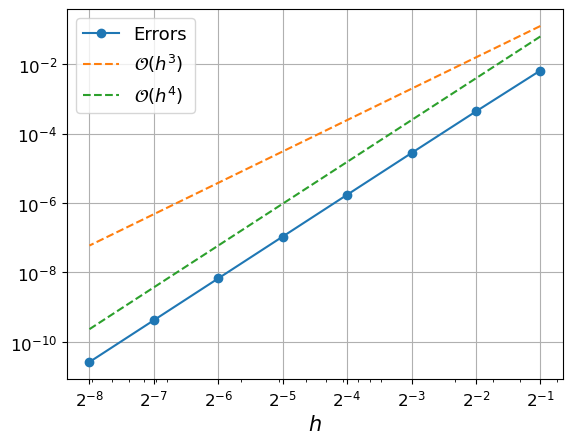

In [16]:
errors, orders, hs = convergence(stencil = [-1, -1/2, 1/2, 1,], k=0)
print(orders)
LABELSIZE= 15
fig, ax = plt.subplots()
# errors = np.abs(dU2(0) - (4/3*U(-hs/2) + 4/3*U(hs/2) - U(-hs) - U(hs)) / hs**2)
ax.loglog(hs, errors, "-o", label=r"Errors")
ax.loglog(hs, hs**3, "--", label=r"$\mathcal{O}(h^3)$")
ax.loglog(hs, hs**4, "--", label=r"$\mathcal{O}(h^4)$")
ax.set_xlabel("$h$", size=LABELSIZE)
ax.set_xticks([1/2**i for i in range(1,len(hs)+1)])
ax.set_xticklabels([rf"$2^{{-{i}}}$" for i in range(1,len(hs)+1)], size=LABELSIZE)
ax.tick_params(axis="both", labelsize=LABELSIZE-3)
ax.legend(fontsize=LABELSIZE-2)
ax.grid()